# TWITTER SENTIMENTAL ANALYSIS

## --> Combination of Unsupervised ML (clustering) & Navie Bayes Classification
### --> Text Minning
### --> Visualization

In [163]:
# Importing important Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd 
import numpy as np
import re
from matplotlib import pyplot as plt
import scipy as sc
import random
from google.colab import files
from collections import Counter

In [164]:
# Style of plot that we want to use throughout
plt.style.use("fivethirtyeight")

# STEPS

### 1. Get Data

In [165]:
# Load the data
uploaded = files.upload()

Saving Tweets.csv to Tweets (1).csv


Extracting dataset

In [166]:
# Get the data (Loading the tweets dataset)
data = pd.read_csv("Tweets.csv")

In [167]:
# Showing the first 10 tweets from dataset
j = 1
print("Show the first 10 tweets of our dataset: \n")
for i in range(10):
  print(j , ")", data["text"][i], "\n")
  j = j + 1

Show the first 10 tweets of our dataset: 

1 )  I`d have responded, if I were going 

2 )  Sooo SAD I will miss you here in San Diego!!! 

3 ) my boss is bullying me... 

4 )  what interview! leave me alone 

5 )  Sons of ****, why couldn`t they put them on the releases we already bought 

6 ) http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth 

7 ) 2am feedings for the baby are fun when he is all smiles and coos 

8 ) Soooo high 

9 )  Both of you 

10 )  Journey!? Wow... u just became cooler.  hehe... (is that possible!?) 



In [168]:
for i in range(50):
  data1 = data['text']


In [169]:
type(str(data1))

str

In [170]:
# Showing the top 50 most frequent words
# print(data['text'])

# data1 = "I am Rayan and i am Rayan"

# split will return the list of all words in a string
split_it = str(data1).split()

# Pass the split_it list to instance (object) of Counter class.
Counter = Counter(split_it)


# most_common() produces 'm' frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(30)
  
print(most_occur)

[('on', 3), ('I', 2), ('going', 2), ('of', 2), ('...', 2), ('The', 2), ('-', 2), ('it', 2), ('0', 1), ('I`d', 1), ('have', 1), ('responded,', 1), ('if', 1), ('were', 1), ('1', 1), ('Sooo', 1), ('SAD', 1), ('will', 1), ('miss', 1), ('you', 1), ('here', 1), ('in', 1), ('San', 1), ('Diego!!!', 1), ('2', 1), ('my', 1), ('boss', 1), ('is', 1), ('bullying', 1), ('me...', 1)]


Text(0.5, 1.0, 'Frequency of Words')

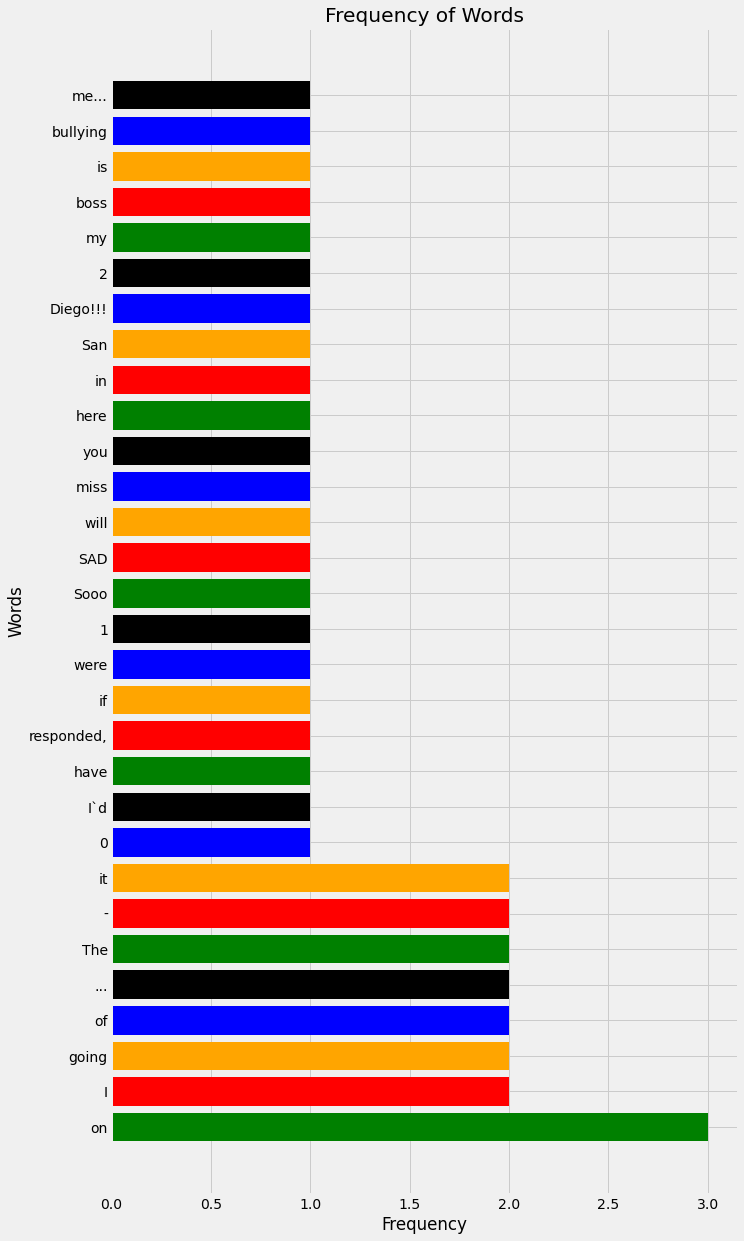

In [171]:
words = [word for word, _ in most_occur]
counts = [counts for _, counts in most_occur]

fig = plt.figure(figsize=(10, 20))
plt.barh(words, counts, color=['green', 'red', 'orange', 'blue', 'black'])
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title("Frequency of Words")

Twitter API credentials

In [ ]:
# Credentials
# consumerKey = data['text'][0]
# consumerSecret = data['text'][1]
# accessToken = data['text'][2]
# accessTokenSecret = data['text'][3]

# print(consumerKey)
# print(consumerSecret)
# print(accessToken)
# print(accessTokenSecret)

In [ ]:
# Create the authentication object
# authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# authenticate.set_access_token(accessToken, accessTokenSecret)

# api = tweepy.API(authenticate, wait_on_rate_limit = True)

Creating DataFrame

In [172]:
# posts = api.user_timeline(screen_name = "Imran Khan", count=100, lang = "en", tweet_mode="extended")

# Creating a dataframe with a column name Tweets
dataFrame = pd.DataFrame([data["text"][i] for i in range(data.shape[0])], columns=['Tweets'])

print("Show the first 5 rows of dataframe: \n")
dataFrame[0:20]

Show the first 5 rows of dataframe: 



,Tweets
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."
5,http://www.dothebouncy.com/smf - some shameles...
6,2am feedings for the baby are fun when he is a...
7,Soooo high
8,Both of you
9,Journey!? Wow... u just became cooler. hehe....


## 2. CLEANING THE DATA

In [174]:
# Clean the data

# Function for cleaning the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', str(text))      # removing mentions '@'
  text = re.sub(r'#', '', text)                   # removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text)             # removing RT
  text = re.sub(r'https?:\/\/\S+', '', text)      # removing the hyper link

  return str(text)

# Apply function to our data (to clean it)
dataFrame['Tweets'] = dataFrame['Tweets'].apply(cleanText)

# Show the cleaned tweets
dataFrame

,Tweets
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."
...,...
27476,wish we could come see u on Denver husband l...
27477,I`ve wondered about rake to. The client has ...
27478,Yay good for both of you. Enjoy the break - y...
27479,But it was worth it ****.


## 3. TRAINING

Computing the SUBJECTIVITY & POLARITY

In [176]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


# Creating two new columns in dataframe (1 for subjectivity & 1 for the polarity)
dataFrame['Subjectivity'] = dataFrame['Tweets'].apply(getSubjectivity)
dataFrame['Polarity'] = dataFrame['Tweets'].apply(getPolarity)

# Showing the updated dataFrame
dataFrame

,Tweets,Subjectivity,Polarity
0,"I`d have responded, if I were going",0.000000,0.000000
1,Sooo SAD I will miss you here in San Diego!!!,1.000000,-0.976562
2,my boss is bullying me...,0.000000,0.000000
3,what interview! leave me alone,0.000000,0.000000
4,"Sons of ****, why couldn`t they put them on t...",0.000000,0.000000
...,...,...,...
27476,wish we could come see u on Denver husband l...,0.000000,0.000000
27477,I`ve wondered about rake to. The client has ...,0.646970,0.184091
27478,Yay good for both of you. Enjoy the break - y...,0.533333,0.366667
27479,But it was worth it ****.,0.100000,0.300000


Implementing the WORD CLOUD

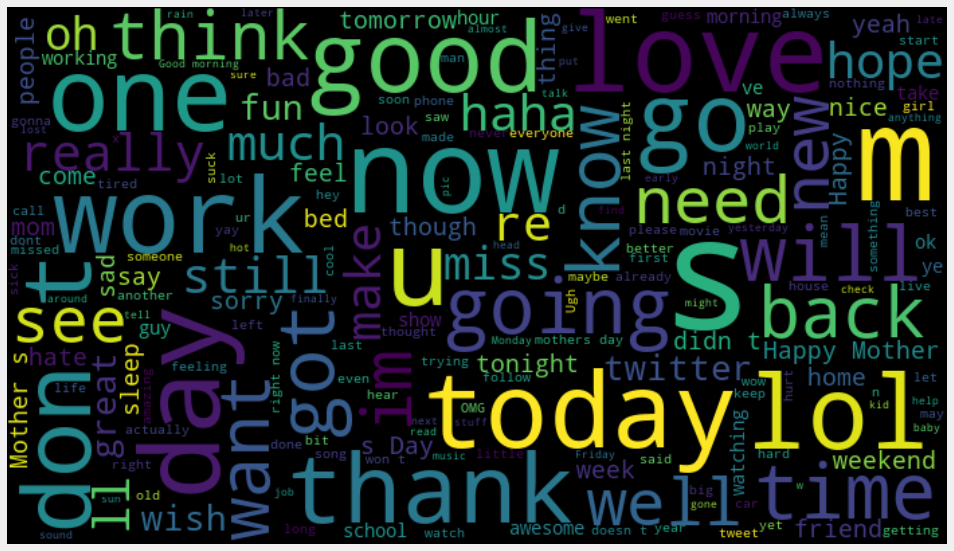

In [178]:
# Plotting the Word Cloud
allWords = ' '.join( [twts for twts in dataFrame['Tweets']] )
wordCloud = WordCloud(width = 700, height = 400, random_state = 21, max_font_size = 119).generate(allWords)

# showing plot
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

Computing the negative, neutral & positive analysis

In [179]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


dataFrame['Analysis'] = dataFrame['Polarity'].apply(getAnalysis)

# Show the dataframe
print("*** Tweets with there predicted sentiments ***")
dataFrame

*** Tweets with there predicted sentiments ***


,Tweets,Subjectivity,Polarity,Analysis
0,"I`d have responded, if I were going",0.000000,0.000000,Neutral
1,Sooo SAD I will miss you here in San Diego!!!,1.000000,-0.976562,Negative
2,my boss is bullying me...,0.000000,0.000000,Neutral
3,what interview! leave me alone,0.000000,0.000000,Neutral
4,"Sons of ****, why couldn`t they put them on t...",0.000000,0.000000,Neutral
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,0.000000,0.000000,Neutral
27477,I`ve wondered about rake to. The client has ...,0.646970,0.184091,Positive
27478,Yay good for both of you. Enjoy the break - y...,0.533333,0.366667,Positive
27479,But it was worth it ****.,0.100000,0.300000,Positive


In [181]:
# Print all of the positive tweets
z = 1
sortedDF = dataFrame.sort_values(by=['Polarity'])

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(z) + ')' + sortedDF['Tweets'][i])
    print()
    z= z+1

Streaming output truncated to the last 5000 lines.
10120)About to watch JONAS!  I love DVR! 

10121) it`s not sooo noticable it depends on how you look at it...but I know it`s there and now my iPod isn`t perfect

10122) will you be posting a pic of you H suit?? Pretty please?

10123) Are you a night owl or what? Always on here as the same time as myself  Enjoy your scifi show.

10124) lol ok then

10125) 16lbs is still a huge achievement though

10126) Were done so much for them, then brazilians ha! but no meh, i think they love the other countries more then the UK

10127) I cannot  I have a full day of activities lol

10128)...what ever happened w/ creating music in collaboration just for fun without the 'what am i getting out of it' question in mind? PLEASE!

10129)google wave next, can`t keep up with the 186 ways i can communicate with people now  what happened to good old fashioned letter writing?

10130)I`ll guess I will see everyone after the weekend  Gunna be having major Tweet 

In [182]:
# Print all of the negative tweets
z = 1
sortedDF = dataFrame.sort_values(by=['Polarity'], ascending ='False')

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(z) + ')' + sortedDF['Tweets'][i])
    print()
    z= z+1

Streaming output truncated to the last 5000 lines.
2937)my stupid msn wont sign in

2938)had to give my 5 year old golden retriever away to another family today  sad 

2939) - Square B - she is sad because she wasn`t there and now she`s, well, square  (crocheted bee with poly fibe ...

2940)Chilling at home

2941)Bored... Some vector ****... Off to work after this class..

2942) Sorry to hear.

2943)Poor little MBA is on fire again

2944)the sun burned me today....my arms look angry  Party tonight tho babes! woop!

2945)Western Digital Caviar Black 1TB SATA 300 NCQ 32MB on the way...

2946)if i make some madeleines, i need to have a bake sale or something. god. boredom needs to = something other than baking

2947) anychance you can get matthew to give a shout out to my mum Sarah for mothers day! we saw 'Ghosts from girlfriends past today'

2948) You`re gonna wear pink outfits??? I assume she bought it for you

2949) - This has never happened before =/ orange blinky lights. I think I`ve

In [183]:
# Print all of the neutral tweets
z = 1
sortedDF = dataFrame.sort_values(by=['Polarity'])

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Neutral'):
    print(str(z) + ')' + sortedDF['Tweets'][i])
    print()
    z= z+1

Streaming output truncated to the last 5000 lines.
6927)Off to England during the summer holidays this year.... yay!

6928)Dont worry babe

6929) hmmm no but I am member of knitterati.com.au what is ravelry offer?

6930)Not in front of the tv  wats the score an inning??

6931)is celebrating her 21st birthday

6932) Yey! holiday Monday in Uk today ... have a chilled day

6933)i feel some type of way cause im not talkin to anyone...

6934) May the fourth be with you

6935) I am actually wanting to buy a bus one day & turn it into a motor home. Imagine a whopping big BlokesLib logo on it

6936)Hanging out with  and the Berlin Jarn guys.  

6937)_Sweethearts Im following you but you aren`t on my DM list  Can you try to DM me?

6938)is putting on her 'suit' (&dont mean jeans&T)&Heading over 2 T-town 2 deal w/ family emergency PLEZ PRAY 4Us  BE back by 630P God willing!

6939)I wanna talk to Mitchel Mussoooooo

6940)Cannot wait to get all dolled up and go out tonight

6941) eat (cup)cake

69

Plotting: Polarity & Subjectivity

<Figure size 576x432 with 0 Axes>

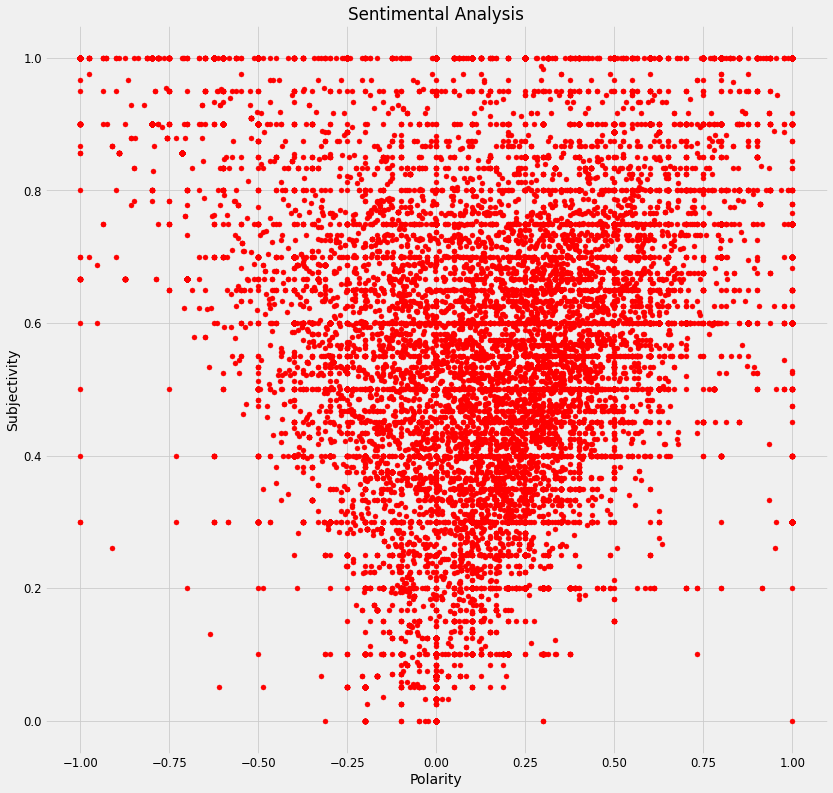

In [185]:
# Plot the Polarity & Subjectivity
plt.figure(figsize=(8,6))

# for i in range(0, dataFrame.shape[0])
plt.figure(figsize=(15, 15), dpi=60)
plt.scatter(dataFrame['Polarity'][0:27000], dataFrame['Subjectivity'][0:27000], color='Red')

plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()

In [186]:
# Get the percentage of Positive tweets
positiveTweets = dataFrame[dataFrame.Analysis == 'Positive']
# print(positiveTweets)

positiveTweets = positiveTweets['Tweets']

# positiveTweets
# positiveTweets.shape[0]
# dataFrame

prob_positive_tweets = round((positiveTweets.shape[0] /dataFrame.shape[0]) * 100, 1)
print("Probability of Positive Tweets", prob_positive_tweets)

Probability of Positive Tweets 45.9


In [187]:
# Get the percentage of Negative tweets
negativeTweets = dataFrame[dataFrame.Analysis == 'Negative']
# print(negativeTweets)

negativeTweets = negativeTweets['Tweets']

# negativeTweets
# negativeTweets.shape[0]
# dataFrame

prob_negative_tweets = round((negativeTweets.shape[0] /dataFrame.shape[0]) * 100, 1)
print("Probability of Negative Tweets", prob_negative_tweets)

Probability of Negative Tweets 19.8


In [188]:
# Get the percentage of Neutral tweets
neutralTweets = dataFrame[dataFrame.Analysis == 'Neutral']
# print(neutralTweets)

neutralTweets = neutralTweets['Tweets']

# neutralTweets
# neutralTweets.shape[0]
# dataFrame

prob_neutral_tweets = round((neutralTweets.shape[0] /dataFrame.shape[0]) * 100, 1)
print("Probability of Neutral Tweets", prob_neutral_tweets)

Probability of Neutral Tweets 34.3


Value Counts of POSITIVE, NEUTRAL & NEGATIVE Tweets

Positive    12619
Neutral      9426
Negative     5436
Name: Analysis, dtype: int64


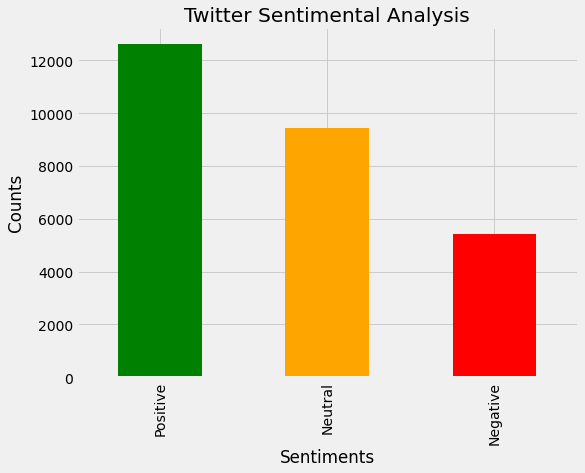

In [189]:
# Show the value counts
dataFrame['Analysis'].value_counts()
print(dataFrame['Analysis'].value_counts())

#crerating a list of colors
c = ['green', 'orange', 'red']

# Plot and visulaize the counts
plt.figure(figsize=(8,6))

plt.title('Twitter Sentimental Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')

dataFrame['Analysis'].value_counts().plot(kind='bar', color = c)

plt.show()
plt.rcParams['axes.facecolor'] = 'gray'

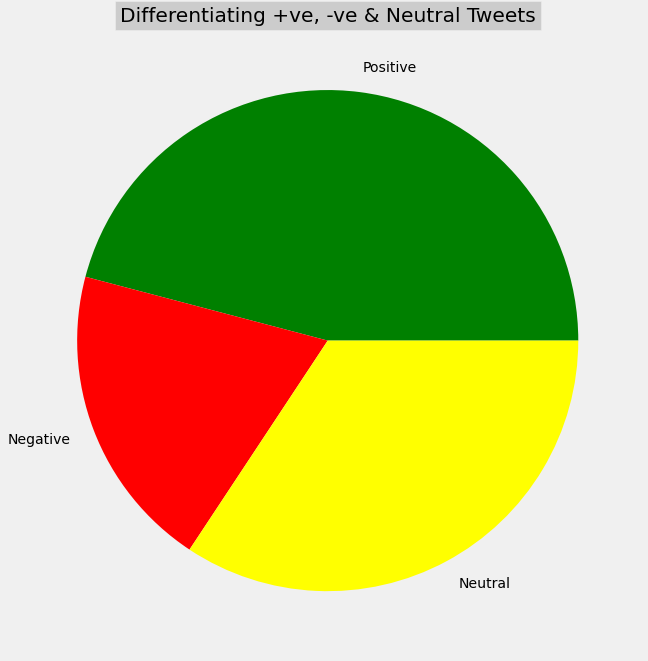

In [208]:
y = np.array([prob_positive_tweets, prob_negative_tweets, prob_neutral_tweets])
mylabels = ["Positive", "Negative", "Neutral"]
colors = ["Green", "Red", "Yellow"]

plt.figure(figsize=(10,12))
plt.pie(y, labels = mylabels, colors= colors)
plt.title('Differentiating +ve, -ve & Neutral Tweets', bbox={'facecolor':'0.8', 'pad':5})
plt.show() 

### 4. Testing

In [190]:
#creating a data frame
# Load the data
uploaded = files.upload()


Saving test.xlsx to test (1).xlsx


In [191]:
# Get the data (Loading the tweets dataset)
data = pd.read_excel("test.xlsx")

In [192]:
# Creating a dataframe with a column name Tweets
dataFrame = pd.DataFrame([data["text"][i] for i in range(data.shape[0])], columns=['Tweets'])

print("Show the first 6 rows of dataframe: \n")
dataFrame[0:6]

Show the first 6 rows of dataframe: 



,Tweets
0,fantastic boy
1,you are a god boy
2,very bad thing
3,dirty tweets
4,hmm ok
5,yeah


In [194]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


# Creating two new columns in dataframe (1 for subjectivity & 1 for the polarity)
dataFrame['Subjectivity'] = dataFrame['Tweets'].apply(getSubjectivity)
dataFrame['Polarity'] = dataFrame['Tweets'].apply(getPolarity)

# Showing the updated dataFrame
dataFrame

,Tweets,Subjectivity,Polarity
0,fantastic boy,0.900000,0.40
1,you are a god boy,0.000000,0.00
2,very bad thing,0.866667,-0.91
3,dirty tweets,0.800000,-0.60
4,hmm ok,0.500000,0.50
5,yeah,0.000000,0.00


In [195]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


dataFrame['Analysis'] = dataFrame['Polarity'].apply(getAnalysis)

# Show the dataframe
print("*** Tweets with there predicted sentiments ***")
dataFrame

*** Tweets with there predicted sentiments ***


,Tweets,Subjectivity,Polarity,Analysis
0,fantastic boy,0.900000,0.40,Positive
1,you are a god boy,0.000000,0.00,Neutral
2,very bad thing,0.866667,-0.91,Negative
3,dirty tweets,0.800000,-0.60,Negative
4,hmm ok,0.500000,0.50,Positive
5,yeah,0.000000,0.00,Neutral


In [196]:
labels = np.array([['Positive'], ['Positive'], ['Negative'], ['Negative'], ['Neutral'], ['Neutral']])

labels

array([['Positive'],
       ['Positive'],
       ['Negative'],
       ['Negative'],
       ['Neutral'],
       ['Neutral']], dtype='<U8')

### Accuracy of Model

In [199]:
# Accuracy
total = 6
acc = 0
for i in range(6):
  if str(labels[i][0]) == dataFrame['Analysis'][i]:
    acc = acc + 1
    # print(acc)

# print(acc)

In [200]:
Total_Accuracy = ((acc/total)*100)

print("Overall Accuracy:: ", Total_Accuracy)

Overall Accuracy::  66.66666666666666


# Running Model using Input data

In [201]:
# Input Testing
data=input("Enter some tweet: ")

Enter some tweet: I am very Good


In [203]:
#creating a data frame
dataFrame=pd.DataFrame([data],columns=['Tweets'])

dataFrame

,Tweets
0,I am very Good


In [204]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


# Creating two new columns in dataframe (1 for subjectivity & 1 for the polarity)
dataFrame['Subjectivity'] = dataFrame['Tweets'].apply(getSubjectivity)
dataFrame['Polarity'] = dataFrame['Tweets'].apply(getPolarity)

# Showing the updated dataFrame
dataFrame

,Tweets,Subjectivity,Polarity
0,I am very Good,0.78,0.91


In [205]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


dataFrame['Analysis'] = dataFrame['Polarity'].apply(getAnalysis)

# Show the dataframe
print("*** Tweets with there predicted sentiments ***")
dataFrame

*** Tweets with there predicted sentiments ***


,Tweets,Subjectivity,Polarity,Analysis
0,I am very Good,0.78,0.91,Positive


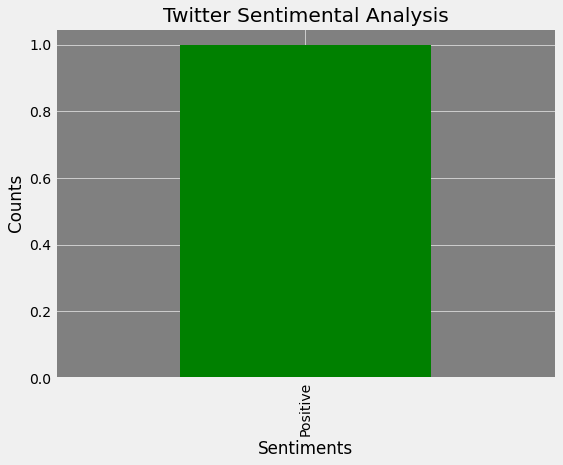

In [207]:
# Show the value counts
dataFrame['Analysis'].value_counts()

#crerating a list of colors
c = ['green', 'orange', 'red']

# Plot and visulaize the counts
plt.figure(figsize=(8,6))

plt.title('Twitter Sentimental Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')

dataFrame['Analysis'].value_counts().plot(kind='bar', color = c)

plt.show()
plt.rcParams['axes.facecolor'] = 'black'

# Real Life Implementation of our Model (Pathaan Movie Rating based on tweets about it) 

In [211]:
# Load the data
uploaded = files.upload()

Saving Book1.xlsx to Book1 (2).xlsx


In [212]:
# Get the data (Loading the tweets dataset)
data = pd.read_excel("Book1.xlsx")
#with open("./Book1.csv", 'r') as file:
  #data = list(csv.reader(file))

In [213]:
# Creating a dataframe with a column name Tweets
dataFrame = pd.DataFrame([data["text"][i] for i in range(data.shape[0])], columns=['Tweets'])

print("Show the first 5 rows of dataframe: \n")
dataFrame[0:20]

Show the first 5 rows of dataframe: 



,Tweets
0,"Stylish, slick and action-packed film; in one ..."
1,SRK is back with a bang and has made his fans ...
2,Good movie by SRK after a long time. It's a pr...
3,this movie is a treat for you to watch.
4,very bad story...did not like it
5,very bad story...did not like it
6,very bad story...did not like it
7,very bad story...did not like it
8,very bad story...did not like it
9,It was a great spy thriller ride from the begi...


In [214]:
# Clean the data

# Function for cleaning the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', str(text))      # removing mentions '@'
  text = re.sub(r'#', '', text)                   # removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text)             # removing RT
  text = re.sub(r'https?:\/\/\S+', '', text)      # removing the hyper link

  return str(text)

# Apply function to our data (to clean it)
dataFrame['Tweets'] = dataFrame['Tweets'].apply(cleanText)

In [215]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


# Creating two new columns in dataframe (1 for subjectivity & 1 for the polarity)
dataFrame['Subjectivity'] = dataFrame['Tweets'].apply(getSubjectivity)
dataFrame['Polarity'] = dataFrame['Tweets'].apply(getPolarity)

In [216]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


dataFrame['Analysis'] = dataFrame['Polarity'].apply(getAnalysis)

# Show the dataframe
print("*** Tweets with there predicted sentiments ***")
dataFrame

*** Tweets with there predicted sentiments ***


,Tweets,Subjectivity,Polarity,Analysis
0,"Stylish, slick and action-packed film; in one ...",0.687500,0.125000,Positive
1,SRK is back with a bang and has made his fans ...,0.525000,0.245833,Positive
2,Good movie by SRK after a long time. It's a pr...,0.366667,0.216667,Positive
3,this movie is a treat for you to watch.,0.000000,0.000000,Neutral
4,very bad story...did not like it,0.866667,-0.910000,Negative
...,...,...,...,...
94,all set to open 500cr club before sehezada rel...,0.500000,0.000000,Neutral
95,1000 we r coming,0.000000,0.000000,Neutral
96,BIGGEST BLOCKBUSTER MOVIE ever !!!,0.000000,0.000000,Neutral
97,No doubt you have done amazing business...hats...,0.900000,0.750000,Positive


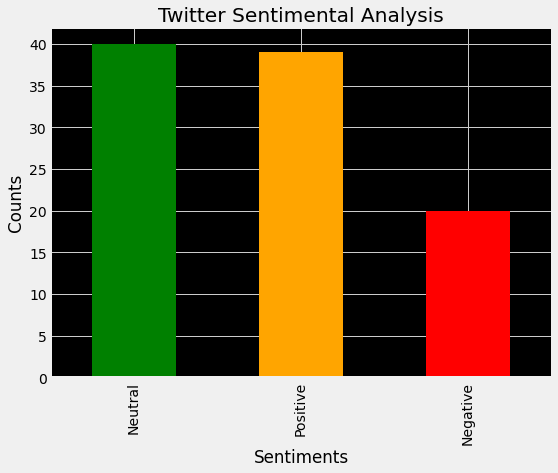

In [219]:
# Show the value counts
dataFrame['Analysis'].value_counts()

#crerating a list of colors
c = ['green', 'orange', 'red']

# Plot and visulaize the counts
plt.figure(figsize=(8,6))

plt.title('Twitter Sentimental Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')

dataFrame['Analysis'].value_counts().plot(kind='bar', color = c)

plt.show()
plt.rcParams['axes.facecolor'] = 'black'

In [220]:
# Get the percentage of Positive tweets
positiveTweets = dataFrame[dataFrame.Analysis == 'Positive']
# print(positiveTweets)

positiveTweets = positiveTweets['Tweets']

# positiveTweets
# positiveTweets.shape[0]
# dataFrame

prob_positive_tweets = round((positiveTweets.shape[0] /dataFrame.shape[0]) * 100, 1)

In [221]:
# Get the percentage of Negative tweets
negativeTweets = dataFrame[dataFrame.Analysis == 'Negative']
# print(negativeTweets)

negativeTweets = negativeTweets['Tweets']

# negativeTweets
# negativeTweets.shape[0]
# dataFrame

prob_negative_tweets = round((negativeTweets.shape[0] /dataFrame.shape[0]) * 100, 1)

In [223]:
rating=0
if prob_negative_tweets < prob_positive_tweets and prob_neutral_tweets < prob_positive_tweets:
  rating=random.randint(7,9)
  print("Movie Rating= ", rating)
elif prob_negative_tweets > prob_positive_tweets and prob_negative_tweets > prob_neutral_tweets:
  rating=random.randint(2, 5)
  print("Movie Rating= ", rating)
else:
  print("Movie Rating= 6")

Movie Rating=  8


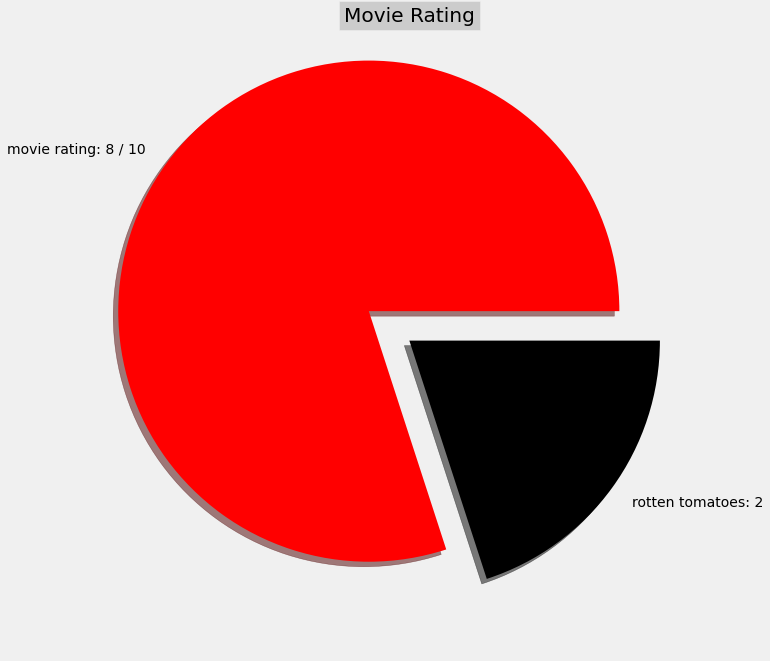

In [224]:
y = np.array([rating,(10-rating)])
mr=("movie rating: " + str(rating) + " / 10") 
rem=("rotten tomatoes: " + str(10 - rating))
mylabels = [mr , rem]
colors = ["Red", "black"]
myexplode=[0.2,0]
plt.figure(figsize=(10,12))
plt.pie(y, labels = mylabels, colors= colors, explode=myexplode, shadow= True)
plt.title('Movie Rating', bbox={'facecolor':'0.8', 'pad':5})
plt.show() 


# OUR MODEL

### We have tried to build a sentimental analysis model which is able to review the facts and opinioins of people around the globe, related to various products and services. Just like we performed it to compute Movie rating. 